# Predicting Cancer Diagnoses
This project leverages a dataset of 1500 patients, containing their medical and lifestyle information to predict their cancer diagnosis. Both k-nearest neighbor models and logistic regression models are used and compared to increase the accuracy of the results.

## 1. Load and Preview Data

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/amanserhan/cancer_detection/The_Cancer_data_1500_V2.csv")
data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [99]:
data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


## 2. Analysis and Modelling

We've got 8 possible columns that can be used as features in our model: age, gender, BMI, genetic risk, physical activity, alcohol intake, and cancer history. Let's start with three of these feature and evaluate them then adjust accordingly. Age, physical activity and smoking habits seem to be a good starting point, so let's train a KNN and a Logistic Regression model on these three features to start.

### KNN Model (Age, Physical Activity, Smoking Habits)

In [103]:
# Imports
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Split features and target
features = data[["Age", "PhysicalActivity", "Smoking"]]
target = data["Diagnosis"]

# Train Test Split
training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Fitting a min-max scaler to the training data
scaler = MinMaxScaler()
scaler.fit(training_data)

# Scaling the training and validation data
training_data_scaled = scaler.transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

training_data_scaled = pd.DataFrame(training_data_scaled, columns=features.columns)
validation_data_scaled = pd.DataFrame(validation_data_scaled, columns=features.columns)

# Creating, fitting and evaluating the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_data_scaled, training_labels)
print(round(knn.score(validation_data_scaled, validation_labels), 3))

0.673


Let's test out different k values to improve our accuracy score.

k =  1 ;  0.577
k =  3 ;  0.643
k =  5 ;  0.673
k =  7 ;  0.673
k =  9 ;  0.663
k =  11 ;  0.653
k =  13 ;  0.65
k =  15 ;  0.667
k =  17 ;  0.67
k =  19 ;  0.663
k =  21 ;  0.66
k =  23 ;  0.673
k =  25 ;  0.67
k =  27 ;  0.687
k =  29 ;  0.673
k =  31 ;  0.68
k =  33 ;  0.69
k =  35 ;  0.687
k =  37 ;  0.69
k =  39 ;  0.69
k =  41 ;  0.69
k =  43 ;  0.68
k =  45 ;  0.69
k =  47 ;  0.69
k =  49 ;  0.693
k =  51 ;  0.693
k =  53 ;  0.687
k =  55 ;  0.69
k =  57 ;  0.687
k =  59 ;  0.683
k =  61 ;  0.677
k =  63 ;  0.68
k =  65 ;  0.683
k =  67 ;  0.673
k =  69 ;  0.673
k =  71 ;  0.68
k =  73 ;  0.687
k =  75 ;  0.683
k =  77 ;  0.683
k =  79 ;  0.683
k =  81 ;  0.69
k =  83 ;  0.687
k =  85 ;  0.687
k =  87 ;  0.69
k =  89 ;  0.693
k =  91 ;  0.693
k =  93 ;  0.683
k =  95 ;  0.683
k =  97 ;  0.683
k =  99 ;  0.687


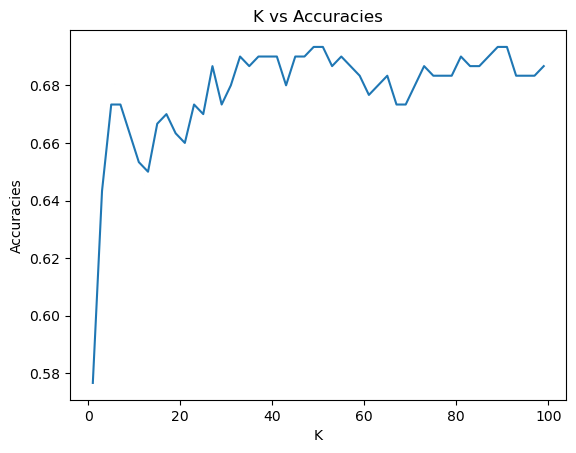

In [105]:
# For loop training the knn model on a k equaling odd values from 1 to 100 and storing the respective accuracy scores.
accuracies = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data_scaled, training_labels)
    score = round(knn.score(validation_data_scaled, validation_labels), 3)
    print("k = ", k, "; ", score)
    accuracy = knn.score(validation_data_scaled, validation_labels)
    accuracies.append(accuracy)


plt.plot(range(1, 100, 2), accuracies)
plt.title("K vs Accuracies")
plt.xlabel("K")
plt.ylabel("Accuracies")
plt.show()

The highest score we got from trying k values from 1 to 100 (odd values) is 0.693. But we're getting a score of 0.69 as early as k=33, however, so let's stick with that for now. The other question to answer is how the impact of each feature compares.
The math behind a KNN algorithm does not support calculating feature importances. We purposefully scale our features before inputting them into the model to ensure features with larger scales do not dominate the calculation. And the nearest neighbors are determined by the points with the most dimensions that are close to the unclassified point. The only possible way to deduce feature importance is by running a different algorithm, like a regression or random forest, calculating their feature importances and inferring that to be similar to the KNN model. However, for our purposes, let's try changing the features up and seeing if the accuracy is improved. If that is not the case, we can try a different classification model, such a logistic regression, where calculating feature importance is more straightforward. 

### KNN Model (Genetic Risk, Alcohol Intake, Cancer History)

In [108]:
# Split features and target
features = data[["GeneticRisk", "AlcoholIntake", "CancerHistory"]]
target = data["Diagnosis"]

training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Train Test Split
scaler = MinMaxScaler()
scaler.fit(training_data)

# Fitting a min-max scaler to the training data
training_data_scaled = scaler.transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

# Scaling the training and validation data
training_data_scaled = pd.DataFrame(training_data_scaled, columns=features.columns)
validation_data_scaled = pd.DataFrame(validation_data_scaled, columns=features.columns)

# Creating, fitting and evaluating the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_data_scaled, training_labels)
print(round(knn.score(validation_data_scaled, validation_labels), 3))

0.763


Already we're seeing a higher score for this collection of features, but let's make sure we've got the most accurate k in this case as well:

k =  1 ;  0.74
k =  3 ;  0.74
k =  5 ;  0.763
k =  7 ;  0.747
k =  9 ;  0.743
k =  11 ;  0.757
k =  13 ;  0.763
k =  15 ;  0.757
k =  17 ;  0.767
k =  19 ;  0.767
k =  21 ;  0.763
k =  23 ;  0.767
k =  25 ;  0.763
k =  27 ;  0.763
k =  29 ;  0.767
k =  31 ;  0.767
k =  33 ;  0.763
k =  35 ;  0.77
k =  37 ;  0.77
k =  39 ;  0.77
k =  41 ;  0.77
k =  43 ;  0.76
k =  45 ;  0.767
k =  47 ;  0.767
k =  49 ;  0.767
k =  51 ;  0.767
k =  53 ;  0.767
k =  55 ;  0.767
k =  57 ;  0.767
k =  59 ;  0.767
k =  61 ;  0.767
k =  63 ;  0.767
k =  65 ;  0.767
k =  67 ;  0.767
k =  69 ;  0.767
k =  71 ;  0.767
k =  73 ;  0.767
k =  75 ;  0.767
k =  77 ;  0.767
k =  79 ;  0.767
k =  81 ;  0.767
k =  83 ;  0.767
k =  85 ;  0.767
k =  87 ;  0.767
k =  89 ;  0.767
k =  91 ;  0.767
k =  93 ;  0.767
k =  95 ;  0.767
k =  97 ;  0.767
k =  99 ;  0.767


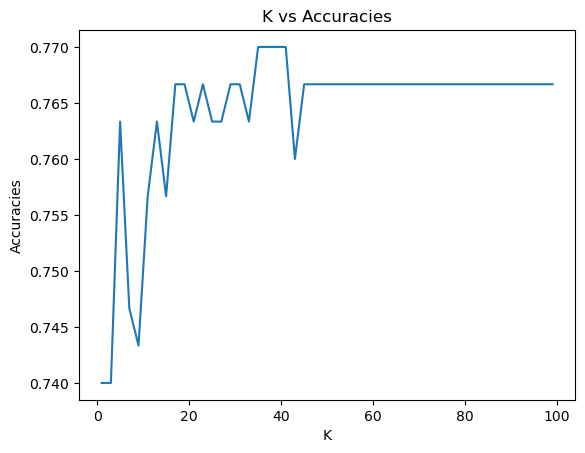

In [110]:
# For loop training the knn model on a k equaling odd values from 1 to 100 and storing the respective accuracy scores.
accuracies = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data_scaled, training_labels)
    score = round(knn.score(validation_data_scaled, validation_labels), 3)
    print("k = ", k, "; ", score)
    accuracy = knn.score(validation_data_scaled, validation_labels)
    accuracies.append(accuracy)


plt.plot(range(1, 100, 2), accuracies)
plt.title("K vs Accuracies")
plt.xlabel("K")
plt.ylabel("Accuracies")
plt.show()

A k of 35 seems to be our best bet, with an accuracy score for 0.77. This tells us that one, two or all three features we used the second time around are more closely correlated with our target result, the diagnosis. If we could calculate feature importance, we could keep only the most closely correlated features in the model to maximize the accuracy of our model. Since that is tough to do with KNN let's do this again with logistic regression and see if we can further improve the accuracy of our classifier.

### Logistic Regression Model (Age, Physical Activity, Smoking Habits)

In [113]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split features and target
features = data[["Age", "PhysicalActivity", "Smoking"]]
target = data["Diagnosis"]

# Train Test Split
training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Fitting and scaling a standard scaler to the data
scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

# Creating, fitting, and evaluating the Logistic Regression model
model = LogisticRegression()
model.fit(training_data_scaled, training_labels)
print(model.score(validation_data_scaled, validation_labels))

0.67


We got the same accuracy score as we did with the KNN model on the same features, so we can assume that the second second features will yield a comparable result as well. Before we change the features, however, let's look at our coefficients from this set of features. 

In [115]:
print(model.coef_)

[[ 0.49110373 -0.33548608  0.51705854]]


Age and Smoking Habits are similar in importance, and physical activity is the least important of all three.
Let's do this again with our second set of features we used for the KNN model, genetic risk, alcohol intake, and cancer history.

### Logistic Regression Model (Genetic Risk, Alcohol Intake, Cancer History)

In [118]:
# Split features and target
features = data[["GeneticRisk", "AlcoholIntake", "CancerHistory"]]
target = data["Diagnosis"]

# Train Test Split
training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Fitting and scaling a standard scaler to the data
scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

# Creating, fitting, and evaluating the Logistic Regression model
model = LogisticRegression()
model.fit(training_data_scaled, training_labels)
print(model.score(validation_data_scaled, validation_labels))

0.7366666666666667


As expected, we got a similar accuracy to the second KNN model. Once again, let's look at the coefficients:

In [120]:
print(model.coef_)

[[0.65465253 0.4955507  1.01422245]]


All of the features in this set seems to be more closely correlated with the diagnosis, compared with the previous set. However, there's two more columns in our dataframe that we haven't tried yet, gender and BMI. Let's fit a logistic regression model with these two features and see our results, to decide if they should make the final cut.

### Logistic Regression Model (Gender, BMI)

In [123]:
# Split features and target
features = data[["Gender", "BMI"]]
target = data["Diagnosis"]

# Train Test Split
training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Fitting and scaling a standard scaler to the data
scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

# Creating, fitting, and evaluating the Logistic Regression model
model = LogisticRegression()
model.fit(training_data_scaled, training_labels)
print(model.score(validation_data_scaled, validation_labels))
print(model.coef_)

0.6866666666666666
[[0.53538809 0.42205448]]


Not too bad - gender seems to be more closely correlated with the diagnosis, but it's still pretty modertate. Since the coefficient for the gender feature is a positive number, and a value of 1 is associated with females, we can conclude that females have a slightly higher chance of getting a positive cancer diagnosis. 

Now that we've looked at all of our features, let's train a model on the most significant features and see if we can improve the accuracy further: 

Genetic Risk, Cancer History, Smoking, Gender

### Logistic Regression Model (Genetic Risk, Cancer History, Smoking, Gender)

In [126]:
# Split features and target
features = data[["GeneticRisk", "CancerHistory", "Smoking", "Gender"]]
target = data["Diagnosis"]

# Train Test Split
training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Fitting and scaling a standard scaler to the data
scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

# Creating, fitting, and evaluating the Logistic Regression model
model = LogisticRegression()
model.fit(training_data_scaled, training_labels)
print(model.score(validation_data_scaled, validation_labels))
print(model.coef_)

0.7733333333333333
[[0.75275006 1.1575112  0.63537594 0.72259186]]


This is our highest accuracy score yet, but let's add in the alcohol intake feature as well and see if that improve our accuracy.

### Logistic Regression Model (Genetic Risk, Cancer History, Smoking, Gender, Alcohol Intake)

In [129]:
# Split features and target
features = data[["GeneticRisk", "CancerHistory", "Smoking", "Gender", "AlcoholIntake"]]
target = data["Diagnosis"]

# Train Test Split
training_data, validation_data, training_labels, validation_labels = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Fitting and scaling a standard scaler to the data
scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.transform(validation_data)

# Creating, fitting, and evaluating the Logistic Regression model
model = LogisticRegression()
model.fit(training_data_scaled, training_labels)
print(model.score(validation_data_scaled, validation_labels))
print(model.coef_)

0.8
[[0.80097753 1.18698225 0.67597224 0.75691569 0.57644873]]


We're seeing a slight improvement in the accuracy of the model after adding in the alcohol intake. 
Based on these results, we can rank the impact each of these factors can have on getting a positive diagnosis:
1. Cancer History
2. Genetic Risk
3. Gender
4. Smoking
5. Alcohol Intake
